In [2]:
import pandas as pd
import numpy as np

In [7]:
import json

with open('../Desktop/maker_dao_abi.json', 'r') as f:
    your_contract_abi = json.load(f)

# Access and use the abi variable in your code
print(your_contract_abi['result'])  # Print the contract ABI
# ... Other code using the contract ABI


[{"constant":true,"inputs":[],"name":"name","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"stop","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"guy","type":"address"},{"name":"wad","type":"uint256"}],"name":"approve","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"owner_","type":"address"}],"name":"setOwner","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"totalSupply","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"src","type":"address"},{"name":"dst","type":"address"},{"name":"wad","type":"uint256"}],"name":"transferFrom","outputs":[{"name":"","type":"bool"}],"payable":false,"stat

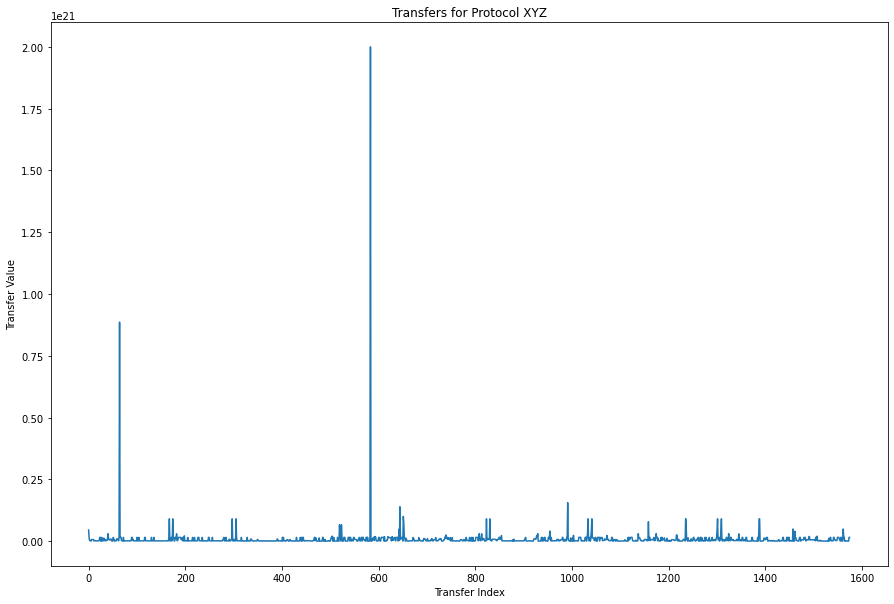

In [8]:
import web3
import matplotlib.pyplot as plt

# Initialize Web3 provider
web3_provider = web3.Web3(web3.HTTPProvider('https://mainnet.infura.io/v3/8cfed8aad74b48f68c7a82bef639ec4d'))

# Define protocol contract address
protocol_contract_address = '0x9f8F72aA9304c8B593d555F12eF6589cC3A579A2'  
# Replace with the actual contract address

# Define start and end blocks for data retrieval
start_block = 10000000
end_block = 10010000

# Retrieve blockchain data
contract = web3_provider.eth.contract(address=protocol_contract_address, abi=your_contract_abi['result'])
transfer_events = contract.events.Transfer.getLogs(fromBlock=start_block, toBlock=end_block)

# Process and filter transfer events
transfers = []
for event in transfer_events:
    # Extract relevant information from the event
    transfer_data = {
        'from': event['args']['from'],
        'to': event['args']['to'],
        'value': event['args']['value'],
    }
    transfers.append(transfer_data)

# Plot transfer data
x = range(len(transfers))
y = [transfer['value'] for transfer in transfers]

plt.figure(figsize=(15,10))
plt.plot(x, y)

plt.xlabel('Transfer Index')
plt.ylabel('Transfer Value')
plt.title('Transfers for Protocol XYZ')
plt.show()


In [9]:
import requests

# Function to convert a timestamp to block number using Infura
def timestamp_to_block_number(timestamp):
    # Infura API endpoint
    endpoint = "https://mainnet.infura.io/v3/8cfed8aad74b48f68c7a82bef639ec4d"

    # Request block number from Infura
    payload = {
        "jsonrpc": "2.0",
        "method": "eth_blockNumber",
        "params": [],
        "id": 1
    }
    response = requests.post(endpoint, json=payload).json()

    if "result" in response:
        latest_block_number = int(response["result"], 16)

        # Infura block time is approximately 13 seconds
        block_time_interval = 13

        # Calculate the target block number based on the timestamp
        target_block_number = latest_block_number - (timestamp // block_time_interval)
        return target_block_number
    else:
        print("Error: Unable to retrieve block number from Infura")
        return None

# Example usage
timestamp = 1622772000  # Example timestamp (June 4, 2021, 12:00:00 in Unix timestamp format)
block_number = timestamp_to_block_number(timestamp)

if block_number is not None:
    print("Block number:", block_number)


Block number: -107327930


In [10]:
import datetime

def date_to_unix_timestamp(year, month, day):
    dt = datetime.datetime(year, month, day)
    timestamp = dt.timestamp()
    return int(timestamp)

In [11]:
date_to_unix_timestamp(year=2023,month=6,day=1)

1685557800